Part1 

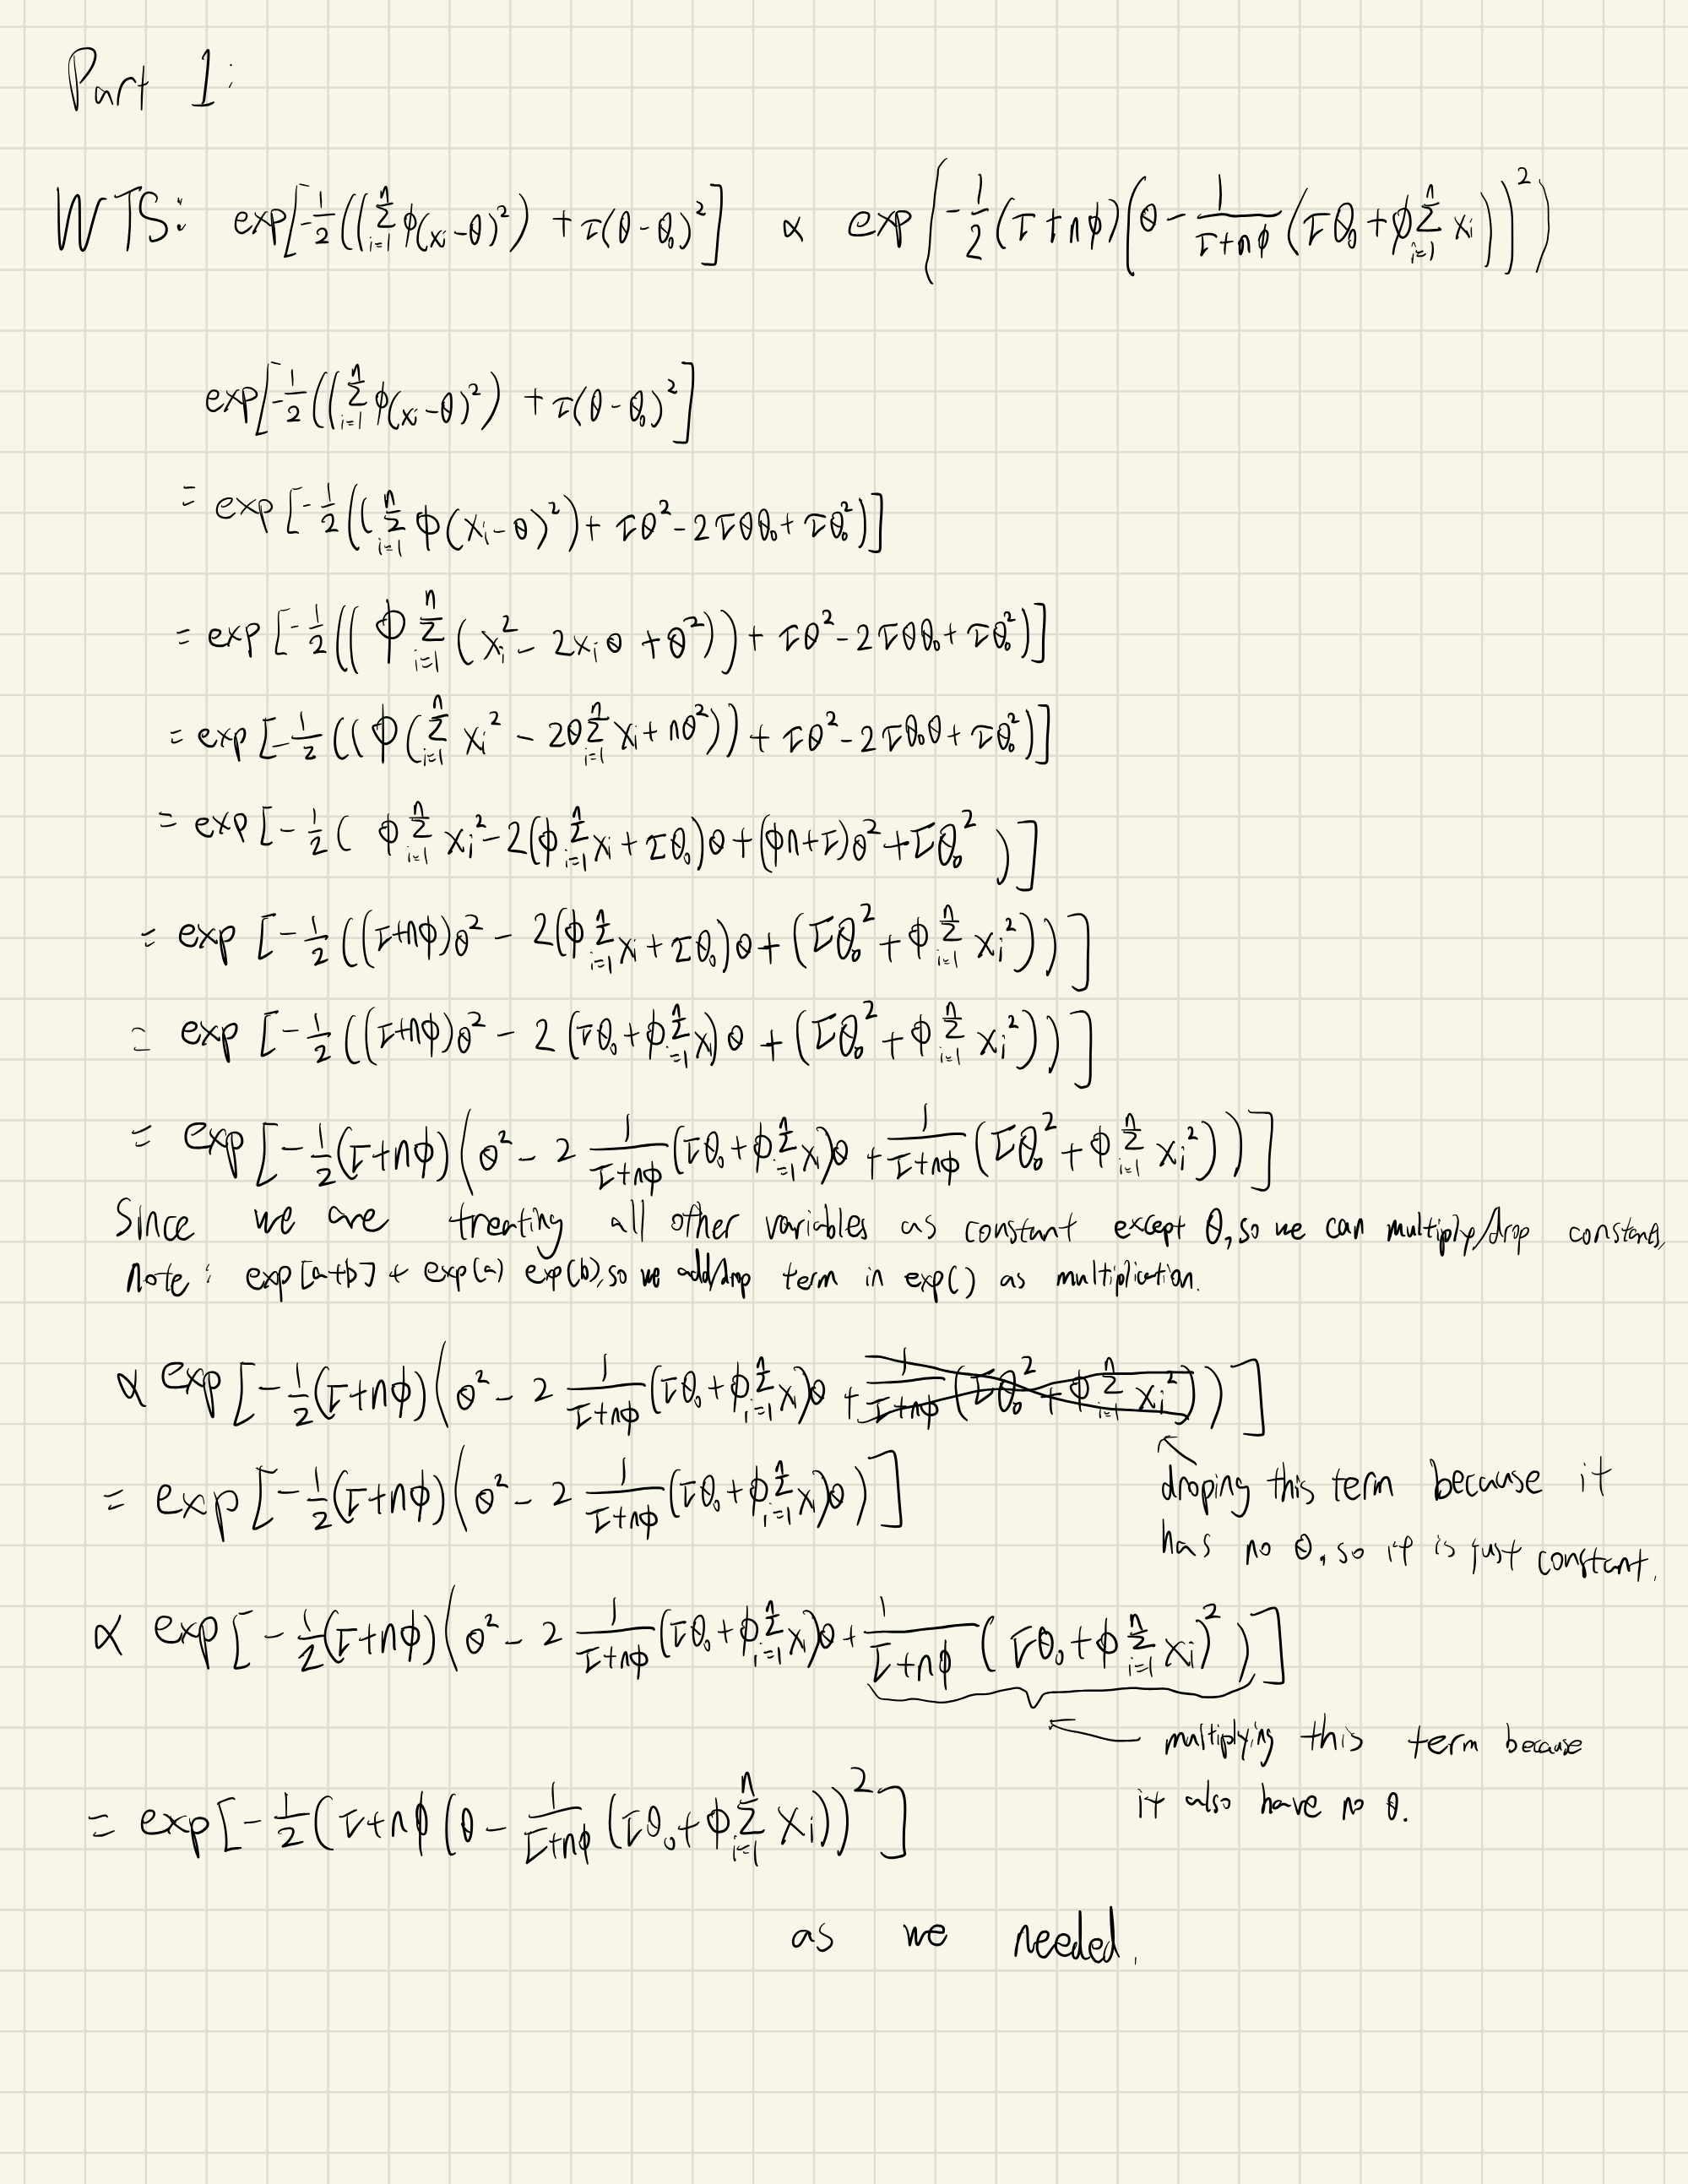

Part2 Q1

Text(0.5, 1.0, 'Visualize various priors, likelihoods of individual observations, posteriors... and joint distribution (which is proportional to...)')

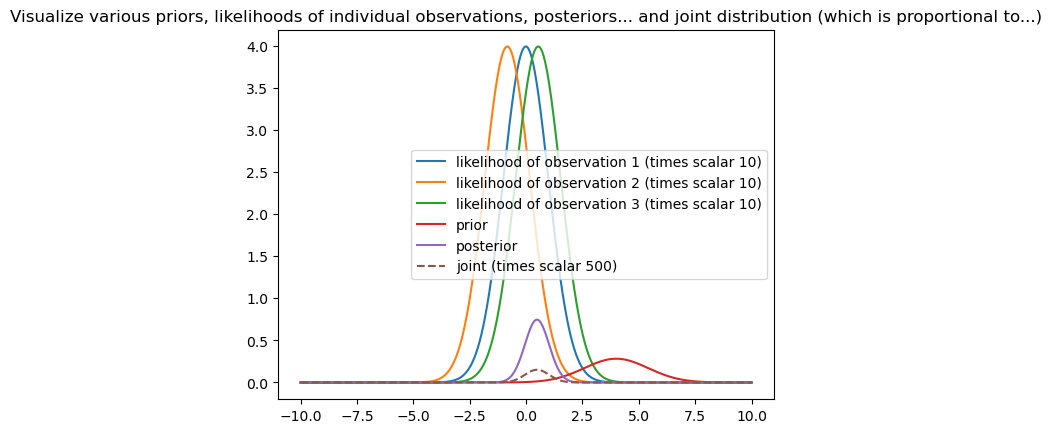

In [2]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
#Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001);
#get individual likelihood for each observations(three)
individual_likelihoods = []
for xi in x:
      individual_likelihoods.append(stats.norm.pdf(parameter_domain, loc=xi, scale=1))
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
c,c2 = 500,10;
likelihood = np.prod(individual_likelihoods, axis=0)
joint = c*likelihood*prior # elementwise multiplication
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

#plot each likelihood, prior, posterior and joint
for i, l in enumerate(individual_likelihoods):
    plt.plot(parameter_domain, c2 * l, label=f"likelihood of observation {i+1} (times scalar {c2})")
plt.plot(parameter_domain, prior, label="prior"); plt.plot(parameter_domain, posterior, label="posterior"); plt.plot(parameter_domain, joint, linestyle="--", label=f"joint (times scalar {c})"); plt.legend();plt.title("Visualize various priors, likelihoods of individual observations, posteriors... and joint distribution (which is proportional to...)")


Part2 Q2

Text(0.5, 1.0, 'Visualize various log_posterior, log_likelihood, log_posterior... and joint distribution (which is proportional to...)')

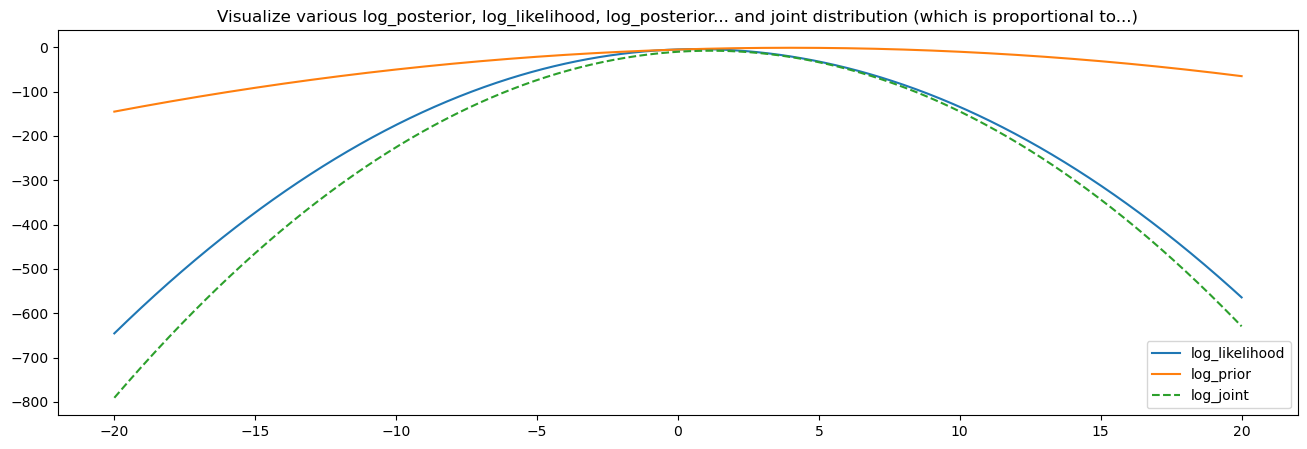

In [4]:
n = 3; x = stats.norm(loc=0,scale=1).rvs(n); theta_0,tau = 4,1/2; parameter_domain = np.linspace(-20,20,1001); 
#get the log likelihood, log prior and log joint
log_likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).sum(axis=0)
log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)

log_joint = log_likelihood+log_prior
#plot them into a graph and they seem to be normally distributed. 
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, log_likelihood, label="log_likelihood")
plt.plot(parameter_domain, log_prior, label="log_prior") 
plt.plot(parameter_domain, log_joint, linestyle="--", label="log_joint")
plt.legend()
plt.title("Visualize various log_posterior, log_likelihood, log_posterior... and joint distribution (which is proportional to...)")

Part2 Q3
Because the probaility of theta is proportional to 1, thus the prior is a flat prior. Since the posterior is also proportional to prior times the likelihood, therefore the posterior is normally distributed just like the joint.



Part2 Q4

When an improper prior is introduced, the log likelihood will remains the same. However, since the log posterior is proportional to log likelihood plus log prior plus the log of the marginal likelihood constant. Hwoever, since the prior is imporper, integrate the probability density function over the parameter space might diverage. The marginal likelihood itself may be undefined or infinite, which can be problematic when normalizing the posterior distribution with it.